# Final Project: Data Cleaning & Exploratory Data Analysis

### New York City Airbnb Dataset

> Author: *Haneul Kim* (ttcielott)

- Repository: 
- Overview & Assesment: 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.shape #(Rows, Cols)

(48895, 16)

### Raw Data View

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#identify missing data with isnull method.
missing_data=df.isnull()
missing_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    48895
Name: id, dtype: int64

name
False    48879
True        16
Name: name, dtype: int64

host_id
False    48895
Name: host_id, dtype: int64

host_name
False    48874
True        21
Name: host_name, dtype: int64

neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64

neighbourhood
False    48895
Name: neighbourhood, dtype: int64

latitude
False    48895
Name: latitude, dtype: int64

longitude
False    48895
Name: longitude, dtype: int64

room_type
False    48895
Name: room_type, dtype: int64

price
False    48895
Name: price, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64

number_of_reviews
False    48895
Name: number_of_reviews, dtype: int64

last_review
False    38843
True     10052
Name: last_review, dtype: int64

reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64

calculated_host_listings_count
False    48895
Name: calculated_host_listings_count, dtype: int64

availability_365
False

In [6]:
#convert data type of 'id' into string to check the number of unique value.
df['id']=df['id'].astype('str')
df['id'].dtype

dtype('O')

In [7]:
#convert data type of 'host_id' into string to check the number of unique value.
df['host_id']=df['host_id'].astype('str')
df['host_id'].dtype

dtype('O')

In [8]:
#convert data type of 'price' into float to make all the prices decimal numbers.
df['price']=df['price'].astype('float')
df['price'].dtype

dtype('float64')

In [9]:
# check the value range of numeric features. 
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Data Cleaning

### List of missing data
- 'name': 16 missing data
- 'host name': 21 missing data
- 'last_review': 10,052 missing data
- 'reviews_per_month': 10,052 missing data

 All of my data cleaning can be done with Pandas. Since the column 'name' and 'host name' don't seem to affect price and the column 'last_review' and 'review_per_month' have so many missing values, I will remove these 4 columns from dataset. 
    
### Value range of numeric features
- 'minimum_nights': 1 to 1250
- 'number_of_reviews': 0 to 629
- 'calculated_host_listing_count': 1 to 327
- 'availability_365': 0 to 365
    
 The value range of numeric features varies. In order to ensure that they have the same impact, I will make the range with 0 to 1. 

In [10]:
df.drop(['name','host_name','last_review','reviews_per_month'], axis=1, inplace=True)
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0


In [11]:
# make range of numeric values withn 0 to 1
n_list=['minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
for column in n_list:
    df[column]=df[column]/df[column].max()
df[n_list].describe()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.005624,0.037002,0.021847,0.308990
std,0.016408,0.070828,0.100772,0.360609
min,0.000800,0.000000,0.003058,0.000000
25%,0.000800,0.001590,0.003058,0.000000
50%,0.002400,0.007949,0.003058,0.123288
75%,0.004000,0.038156,0.006116,0.621918
max,1.000000,1.000000,1.000000,1.000000


## EDA (Exploratory Data Analysis)

In order to unconver which features make an impact on price, I will expore
- review-related data and price to see their relationship visualizing it through scatterplot.
- the combination of location and room type and price to see their relationship visualizing it through heatmap 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

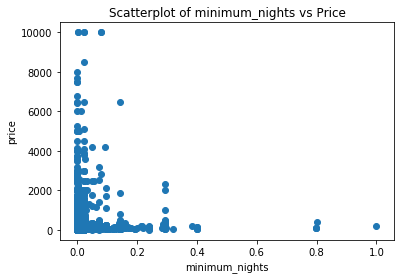

In [13]:
# create the scatterplot of 'minimum nights' and 'price'
x=df[n_list[0]]
y=df['price']
plt.scatter(x,y)
plt.title('Scatterplot of '+n_list[0]+' vs Price')
plt.xlabel(n_list[0])
plt.ylabel('price')
plt.show()

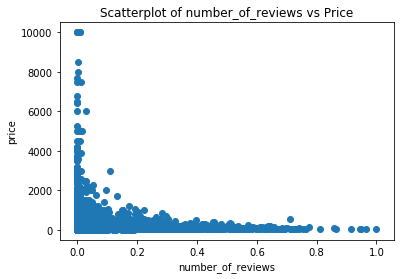

In [14]:
# create the scatterplot of 'number of reviews' and 'price'
x=df[n_list[1]]
y=df['price']
plt.scatter(x,y)
plt.title('Scatterplot of '+n_list[1]+' vs Price')
plt.xlabel(n_list[1])
plt.ylabel('price')
plt.show()

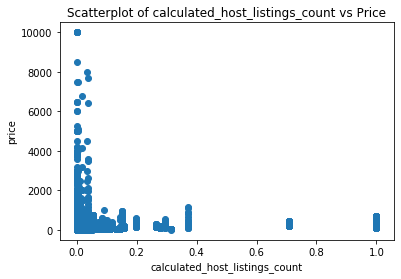

In [15]:
# create the scatterplot of 'calculated hosts listings count' and 'price'
x=df[n_list[2]]
y=df['price']
plt.scatter(x,y)
plt.title('Scatterplot of '+n_list[2]+' vs Price')
plt.xlabel(n_list[2])
plt.ylabel('price')
plt.show()

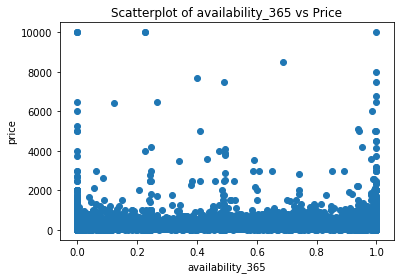

In [16]:
# create the scatterplot of 'availability' and 'price'
x=df[n_list[3]]
y=df['price']
plt.scatter(x,y)
plt.title('Scatterplot of '+n_list[3]+' vs Price')
plt.xlabel(n_list[3])
plt.ylabel('price')
plt.show()

### EDA 1. Relationship between Review-related Features and Price

Result: According to scatterplots above, it is assumed that review-related features don't have impact on price. 

In [17]:
# check the relationship between two features 'neighbourhoood group', 'room type' and 'price'
# pick out the related columns
df_loc_rt=df[['neighbourhood_group','room_type','price']] 

# group price by neighbourhood group and room type.
df_loc_rt_grp=df_loc_rt.groupby(['neighbourhood_group', 'room_type'], as_index=False).mean().round(2) 
df_loc_rt_grp

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.51
1,Bronx,Private room,66.79
2,Bronx,Shared room,59.80
3,Brooklyn,Entire home/apt,178.33
4,Brooklyn,Private room,76.50
5,Brooklyn,Shared room,50.53
6,Manhattan,Entire home/apt,249.24
7,Manhattan,Private room,116.78
8,Manhattan,Shared room,88.98
9,Queens,Entire home/apt,147.05


In [18]:
# convert the table into pivot for better representation
df_pivot=df_loc_rt_grp.pivot(index='neighbourhood_group', columns='room_type')
df_pivot

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                        127.51        66.79       59.80
Brooklyn                     178.33        76.50       50.53
Manhattan                    249.24       116.78       88.98
Queens                       147.05        71.76       69.02
Staten Island                173.85        62.29       57.44

In [ ]:
df_pivot.to_csv('price-reference.csv')

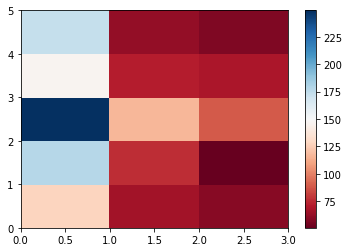

In [19]:
# convert the pivot table into graphical form (heatmap) for better representation
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### EDA 3. Relationship between the Combination of :Location and Room Type and Price

Result: According to the heatmap above, there were the following findings:

- The highest average price is of 'Entire home/apt' in Manhattan
- The lowest average price is of 'Shared room' in Brooklyn
- The average price ranking (the highst to the lowest) in the room type, 'Entire home/apt'
> 1. Manhattan   2. Brooklyn   3. Staten island   4. Queens   5. Bronx
- The average price ranking (the highest to the lowest) in the room type, 'Private room'
> 1. Manhattan   2. Brooklyn   3. Queens   4. Bronx   5. Staten island
- The average price ranking (the highest to the lowest) in the room type, 'Shared room'
> 1. Manhattan   2. Queens   3. Bronx   4. Staten island  5. Brooklyn

